In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import pickle


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
mouse = '4139224.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
805,4139224.3,18_10_2018,1,TwoTower_noTimeout,61,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
807,4139224.3,18_10_2018,3,TwoTower_noTimeout,41,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
841,4139224.3,20_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-20,G:\My Drive\VR_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...
879,4139224.3,23_10_2018,1,TwoTower_Timeout,48,1,CA1,2018-10-23,G:\My Drive\VR_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...
909,4139224.3,25_10_2018,1,TwoTower_Timeout,69,1,,2018-10-25,G:\My Drive\VR_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...
933,4139224.3,26_10_2018,3,TwoTower_Timeout,72,1,CA1,2018-10-26,G:\My Drive\VR_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...
949,4139224.3,27_10_2018,4,TwoTower_Timeout,67,1,CA1,2018-10-27,G:\My Drive\VR_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...
959,4139224.3,29_10_2018,1,TwoTower_Timeout,71,1,CA1,2018-10-29,G:\My Drive\VR_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...
970,4139224.3,30_10_2018,1,TwoTower_Timeout,78,1,CA1,2018-10-30,G:\My Drive\VR_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...
983,4139224.3,31_10_2018,2,TwoTower_Timeout,66,1,CA1,2018-10-31,G:\My Drive\VR_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...


In [9]:
sess = df_mouse.iloc[-3]

In [10]:
VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat.speed._values)

num aberrant ttls 0.0
32188 (32188,) (32188, 20) 101194
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:324: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [11]:
pos = VRDat.pos._values
pos_mask = (pos>0) & (pos<450.)

pos_trialonly = pos[pos_mask]
S_trialonly = S[pos_mask,:]
C_trialonly= C[pos_mask,:]

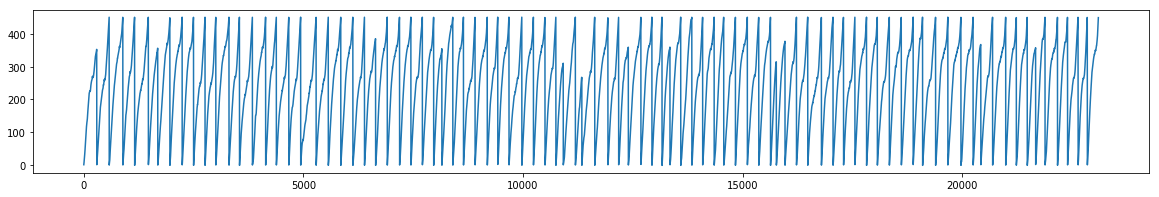

In [12]:
f,ax = plt.subplots(figsize=[20,3])
ax.plot(pos_trialonly)

In [13]:
with open("G:\\My Drive\\HMMGLM_DemoData\\4139224.3_30_10_2018_1.pkl",'wb') as f:
    pickle.dump({'activity_rate':S_trialonly,'position':pos_trialonly,'dff':C_trialonly},f)


In [5]:
print(S_trial_mat.shape)

(120, 45, 1340)


In [6]:
S.shape

(36583, 1340)

In [9]:
S_tmat = np.zeros([S_trial_mat.shape[0]*S_trial_mat.shape[1],S_trial_mat.shape[-1]])
nposbins = S_trial_mat.shape[1]

In [10]:
for t in range(S_trial_mat.shape[0]-1):
    S_tmat[t*nposbins:(t+1)*nposbins,:]=np.squeeze(S_trial_mat[t,:,:])

In [11]:
print(S_tmat.shape)

(5400, 1340)


In [19]:
# d = {}
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['towerJitter']+trial_info['wallJitter']
effMorph+=.25
effMorph/=1.5
print(np.amin(effMorph),np.amax(effMorph))
with open('4139265.5_24_02_2019_2.pkl','wb+') as f:
    pickle.dump({'deconv_dff':S,'raw_pos':VRDat.pos._values,'raw_morph':VRDat.morph._values,'trial_tensor_dff':S_trial_mat,'pos_binned_dff':S_tmat,'trial_morph':effMorph},f)


0.007254992307692297 0.9363291076923077


In [20]:
with open('4139265.5_24_02_2019_2.pkl','rb+') as f:
    d = pickle.load(f)
print(d.keys())

dict_keys(['raw_dff', 'raw_pos', 'raw_morph', 'trial_tensor_dff', 'pos_binned_dff', 'trial_morph'])


In [21]:
for k,v in d.items():
    print(k,v.shape)

raw_dff (36583, 1340)
raw_pos (36583,)
raw_morph (36583,)
trial_tensor_dff (120, 45, 1340)
pos_binned_dff (5400, 1340)
trial_morph (120,)


In [22]:
print(np.isnan(S_trial_mat).sum())

0
